create separate models for title prediction and/or text prediction and divide the dataset into title datasets and text datasets. for that need to redo

Importing primary dependencies for data fetch and cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from pandas import read_csv

Various constants

In [2]:
max_features=10240
max_len=2048
test_prop=0.3
epoch_count=100
batch_size=512
min_string_len=240

Sources of the datasets are mentioned here

In [3]:
#'Fake and real news dataset' by Clement Bisaillon
#https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

data1_fake=read_csv('https://raw.githubusercontent.com/MobiusYeeitus/FakeNewsDetection/main/datasets/set1/fake.csv')
data1_real=read_csv('https://raw.githubusercontent.com/MobiusYeeitus/FakeNewsDetection/main/datasets/set1/true.csv')

#'Fake News' Community Prediction Competition on Kaggle
#https://www.kaggle.com/c/fake-news/data

data2=read_csv(
    'https://raw.githubusercontent.com/MobiusYeeitus/FakeNewsDetection/main/datasets/set2/train.csv')

#'Getting Real about Fake News' by Meg Risdal
#https://www.kaggle.com/datasets/mrisdal/fake-news

data3=read_csv('https://raw.githubusercontent.com/MobiusYeeitus/FakeNewsDetection/main/datasets/set3/fake.csv')

#'Fake News' by Hassan Amin
#https://www.kaggle.com/datasets/hassanamin/textdb3

data4=read_csv('https://raw.githubusercontent.com/MobiusYeeitus/FakeNewsDetection/main/datasets/set4/fake_or_real_news.csv')

In [4]:
data1_fake.sample(4)

,title,text,subject,date
9163,WATCH SWAMP MONSTER James Clapper Make False C...,Watch some fake news from a swamp creature who...,politics,"Dec 18, 2017"
15581,(VIDEO) NEW AD FROM CARLY FIORINA HAMMERS HILL...,"However you feel about Fiorina, this ad takes ...",politics,"Jun 11, 2015"
16302,GREAT! PRO-COAL OKLAHOMA AG Tapped For Head Of...,When the Environmental Protection Agency prop...,Government News,"Dec 7, 2016"
19906,HILLARY SUPPORTER AND MUSLIM IMMIGRANT Who Sho...,This story is a perfect example of why Barack ...,left-news,"Sep 28, 2016"


In [5]:
data1_real.sample(4)

,title,text,subject,date
3060,Trump says he has not obstructed FBI's probe R...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"June 23, 2017"
10698,U.S. lawmakers offer bills to counter Obama Gu...,WASHINGTON (Reuters) - Republican lawmakers in...,politicsNews,"February 23, 2016"
20573,U.S. calls for U.N. Security Council vote on N...,UNITED NATIONS (Reuters) - The United States o...,worldnews,"September 9, 2017"
15043,South Africa's opposition asks court to force ...,JOHANNESBURG (Reuters) - South Africa s main o...,worldnews,"November 12, 2017"


In [6]:
data2.sample(4)

,id,title,author,text,label
12616,12616,"PICTURES: MILO Defies Protesters, Administrati...",Lucas Nolan,Hundreds of people turned up today to join Bre...,0
15879,15879,"45,000 Pounds of Would-Be Pennies Coat Highway...",Jonah Engel Bromwich,It looked like free money all over the highway...,0
2557,2557,Fire Dept. Battalion Chief Killed in Bronx Exp...,Eli Rosenberg and Emily Palmer,The early morning call seemed relatively routi...,0
19868,19868,15 Foods High In Folic Acid,Dr. Edward F. Group III,in: General Health There are a number of reaso...,1


In [7]:
data3.sample(4)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
10431,08fa6c2e2785041b571617801de88b735c859eda,0,Gaye Levy,2016-10-29T21:46:00.000+03:00,Prepper Preparedness: Personal Fitness And Health,Stomach upset Sleep problems Evaluate the stre...,english,2016-10-30T04:10:48.205+02:00,thesleuthjournal.com,US,NaN,Prepper Preparedness: Personal Fitness And Health,0.000,http://www.thesleuthjournal.com/wp-content/upl...,0,1,0,0,0,bs
7331,bbabc12a5a43b3e63e63b0d3c50bc40555548eac,0,NaN,2016-10-28T00:05:34.773+03:00,Ученые сделали аккумулятор нового поколения по...,0 комментариев 0 поделились Фото: АР \nВ журна...,russian,2016-10-28T00:05:34.773+03:00,pravda.ru,RU,12191.0,Ученые сделали аккумулятор нового поколения по...,0.000,http://www.pravda.ru/image/preview/article//9/...,0,0,0,0,0,bs
6912,4718e3b4280cc068f25e97b3153c531401e2cf5f,0,NaN,2016-10-27T09:02:11.410+03:00,"Tom Hayden, Courageous Warrior for Peace",License DMCA \nWhen Tom Hayden died on Oct. 23...,english,2016-10-27T09:02:11.410+03:00,opednews.com,US,61423.0,"Tom Hayden, Courageous Warrior for Peace",0.000,http://www.opednews.com/populum/cachedimages/s...,0,0,0,0,0,bs
8895,da3b073ee151c27fc669af10acd5d2b08121cbde,0,NaN,2016-11-03T21:17:00.000+02:00,Tim Kaine: “Hillary Will Modify Obamacare To I...,Elections 2016 \nVice Presidential nominee Tim...,english,2016-11-04T08:38:18.129+02:00,spinzon.com,US,NaN,Tim Kaine: “Hillary Will Modify Obamacare To I...,0.039,http://spinzon.com/wp-content/uploads/2016/09/...,0,0,0,0,0,bs


In [8]:
data4.sample(4)

,Unnamed: 0,title,text,label
967,5673,HIV ‘Cure’ Almost Complete after Scientists Re...,Research could ‘potentially serve as a curativ...,FAKE
5878,8270,Hillary Clinton v Donald Trump in 2016,"With just four days left until election day, m...",FAKE
2050,260,"Under speaker pressure, signs pointing to a re...",As soon as Rep. Kevin McCarthy (R-Calif.) shoc...,REAL
3017,4928,Clinton Enters Fall With Key Advantages in Whi...,"Two months from Election Day, Hillary Clinton ...",REAL


Compressing every cleanup job into the *clean_csv* function

In [9]:
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
stem=PorterStemmer()

from gensim.parsing.preprocessing import remove_stopwords
pd.options.mode.chained_assignment=None

Stemming not used after testing indicates reduced accuracy, suspecting nouns as cause

In [10]:
def stemming(string): #not using stemming, reduces accuracy with nouns
    review = re.sub('[^a-zA-Z]',' ',string)
    review = review.lower()
    review = review.split()
    review = [stem.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    return review

*clean_string* function for use in *clean_csv* function

In [11]:
def clean_string(string): #function to clean a string | to be used in clean_csv
    string=string.lower() #convert string to lowercase
    string=re.sub('\n|\r|\t','',string) #cleaning of whitespaces
    string=re.sub(r'[^\w\s]+','',string) #cleaning of symbols
    return string

Variations of *clean_csv* function for use in different kinds of datasets

In [12]:
def clean_csv_with_identity(df,identity): #cleaning the CSV file
    print('Cleaning CSV.')
    df=df.dropna() #drop all tuples with empty attributes
    length=[]
    [length.append(len(str(text))) for text in df["text"]] #calculate length of an article
    df['length']=length #saves the length of the article in a new column
    df=df.drop(df['text'][df['length']<min_string_len].index,axis=0) #drop all tuples with less than min_string_len letters
    #df['text']=df['title']+" "+df['text'] #append text to title
    vfunc=np.vectorize(clean_string) #vectorize the clean_string function for use in pandas df
    df['text']=vfunc(df['text']) #apply the vectorized function to further clean the data
    df['identity']=identity #add the identity (T/F) or (0/1) in a new attribute to the data
    df.reset_index() #reset all indexes of the dataset
    for x in range (len(df)):
        df['text'].iloc[x]=remove_stopwords(df['text'].iloc[x]) #cleaning stopwords
    print('Cleaning completed.')
    return df

def optimized_cleaning_with_identity(df,identity): #optimized for less than 16GiB RAM
    print('Optimizing cleaning.')
    df_temp1=df.iloc[:int(len(df)/2),:]
    df_temp2=df.iloc[int(len(df)/2):,:]
    df_temp1_c=clean_csv_with_identity(df_temp1,identity)
    df_temp2_c=clean_csv_with_identity(df_temp2,identity)
    df_temp=pd.concat([df_temp1_c,df_temp2_c],ignore_index=True)
    return df_temp

In [13]:
def clean_csv_without_identity(df): #cleaning the CSV file
    print('Cleaning CSV.')
    df=df.dropna() #drop all tuples with empty attributes
    length=[]
    [length.append(len(str(text))) for text in df["text"]] #calculate length of an article
    df['length']=length #saves the length of the article in a new column
    df=df.drop(df['text'][df['length']<min_string_len].index,axis=0) #drop all tuples with less than min_string_len letters
    #df['text']=df['title']+" "+df['text'] #append text to title
    vfunc=np.vectorize(clean_string) #vectorize the clean_string function for use in pandas df
    df['text']=vfunc(df['text']) #apply the vectorized function to further clean the data
    df.reset_index() #reset all indexes of the dataset
    for x in range (len(df)):
        df['text'].iloc[x]=remove_stopwords(df['text'].iloc[x]) #cleaning stopwords
    df.rename(columns={'label':'identity'},inplace=True)
    print('Cleaning completed.')
    return df

def optimized_cleaning_without_identity(df): #optimized for less than 16GiB RAM
    print('Optimizing cleaning.')
    df_temp1=df.iloc[:int(len(df)/2),:]
    df_temp2=df.iloc[int(len(df)/2):,:]
    df_temp1_c=clean_csv_without_identity(df_temp1)
    df_temp2_c=clean_csv_without_identity(df_temp2)
    df_temp=pd.concat([df_temp1_c,df_temp2_c],ignore_index=True)
    return df_temp

In [14]:
def clean_csv_with_label_replace(df,label_real,label_fake): #cleaning the CSV file
    print('Cleaning CSV.')
    df=df.dropna() #drop all tuples with empty attributes
    df['label'].replace(to_replace=str('REAL'),value=str('1'),inplace=True) #replace the labels with corresponding values (0/1)
    df['label'].replace(to_replace=str('FAKE'),value=str('0'),inplace=True)
    length=[]
    [length.append(len(str(text))) for text in df["text"]] #calculate length of an article
    df['length']=length #saves the length of the article in a new column
    df=df.drop(df['text'][df['length']<min_string_len].index,axis=0) #drop all tuples with less than min_string_len letters
    #df['text']=df['title']+" "+df['text'] #append text to title
    vfunc=np.vectorize(clean_string) #vectorize the clean_string function for use in pandas df
    df['text']=vfunc(df['text']) #apply the vectorized function to further clean the data
    df.rename(columns={'label':'identity'},inplace=True) #renaming column
    df.reset_index() #reset all indexes of the dataset
    for x in range (len(df)):
        df['text'].iloc[x]=remove_stopwords(df['text'].iloc[x]) #cleaning stopwords
    print('Cleaning completed.')
    return df

def optimized_cleaning_with_label_replace(df,label_real,label_fake): #optimized for less than 16GiB RAM
    print('Optimizing cleaning.')
    df_temp1=df.iloc[:int(len(df)/2),:]
    df_temp2=df.iloc[int(len(df)/2):,:]
    df_temp1_c=clean_csv_with_label_replace(df_temp1,label_real,label_fake)
    df_temp2_c=clean_csv_with_label_replace(df_temp2,label_real,label_fake)
    df_temp=pd.concat([df_temp1_c,df_temp2_c],ignore_index=True)
    return df_temp

Splitting up the datasets to conserve RAM, and avoid crashes during cleaning by using the optimized functions

In [15]:
data1_fake_c=optimized_cleaning_with_identity(data1_fake,0)

Optimizing cleaning.
Cleaning CSV.
Cleaning completed.
Cleaning CSV.
Cleaning completed.


Before cleaning,

In [16]:
data1_fake.tail(2)

,title,text,subject,date
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


After cleaning

In [17]:
data1_fake_c.tail(2)

,title,text,subject,date,length,identity
21746,How to Blow $700 Million: Al Jazeera America F...,21st century wire says al jazeera america hist...,Middle-east,"January 14, 2016",2685,0
21747,10 U.S. Navy Sailors Held by Iranian Military ...,21st century wire says 21wire predicted new ye...,Middle-east,"January 12, 2016",5251,0


Visual representation

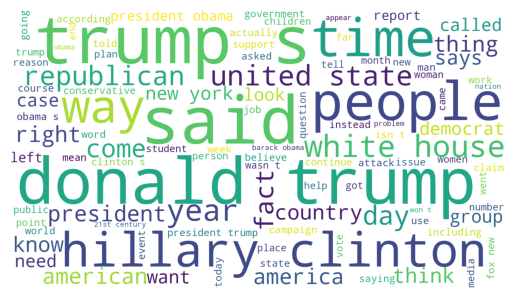

In [18]:
wc=WordCloud(background_color="white",max_words=100,max_font_size=256,random_state=42,width=1920,height=1080,stopwords=None)
wc.generate(' '.join(data1_fake_c['text']))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [19]:
data1_real_c=optimized_cleaning_with_identity(data1_real,1)

Optimizing cleaning.
Cleaning CSV.
Cleaning completed.
Cleaning CSV.
Cleaning completed.


Before cleaning,

In [20]:
data1_real.tail(2)

,title,text,subject,date
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


After cleaning

In [21]:
data1_real_c.tail(2)

,title,text,subject,date,length,identity
21302,Vatican upbeat on possibility of Pope Francis ...,moscow reuters vatican secretary state cardina...,worldnews,"August 22, 2017",1199,1
21303,Indonesia to buy $1.14 billion worth of Russia...,jakarta reuters indonesia buy 11 sukhoi fighte...,worldnews,"August 22, 2017",1338,1


Visual representation

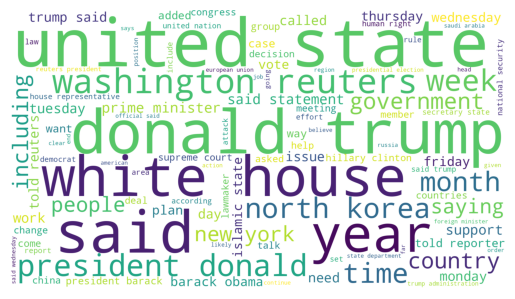

In [22]:
wc=WordCloud(background_color="white",max_words=100,max_font_size=256,random_state=42,width=1920,height=1080,stopwords=None)
wc.generate(' '.join(data1_real_c['text']))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [23]:
data2_c=optimized_cleaning_without_identity(data2)

Optimizing cleaning.
Cleaning CSV.
Cleaning completed.
Cleaning CSV.
Cleaning completed.


Before cleaning,

In [24]:
data2.tail(2)

,id,title,author,text,label
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


After cleaning

In [25]:
data2_c.tail(2)

,id,title,author,text,identity,length
17685,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,nato russia hold parallel exercises balkans 11...,1,1773
17686,20799,What Keeps the F-35 Alive,David Swanson,david swanson author activist journalist radio...,1,7043


Visual representation

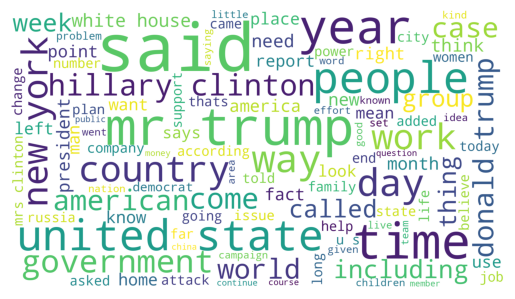

In [26]:
wc=WordCloud(background_color="white",max_words=100,max_font_size=256,random_state=42,width=1920,height=1080,stopwords=None)
wc.generate(' '.join(data2_c['text']))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [27]:
data3_c=optimized_cleaning_with_identity(data3,0)

Optimizing cleaning.
Cleaning CSV.
Cleaning completed.
Cleaning CSV.
Cleaning completed.


Before cleaning,

In [28]:
data3.tail(2)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
12997,7de8ae90eee164eb756db6c8a3772288e11d7a94,5,beemasters,2016-10-27T00:09:00.000+03:00,NaN,$4 Billion even after they are known to be kee...,english,2016-10-27T00:37:46.247+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.0,NaN,40,32,0,0,0,bs
12998,dabef7095b7d9dae6eb0d83c4cbb40b85efd7ae5,6,i&#039;m-confused,2016-10-27T00:09:00.000+03:00,NaN,of course - how else would they disceminate te...,english,2016-10-27T00:37:46.260+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.0,NaN,40,32,0,0,0,bs


After cleaning

In [29]:
data3_c.tail(2)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,...,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,length,identity
4563,c38ae8b746f70c6a262bf37822829f4cc31bddbd,0,Edmondo Burr,2016-11-01T18:15:25.543+02:00,Australia Is Worried Foreign Migrants Are Coming,sputnik reports australian prime minister malc...,english,2016-11-01T18:15:25.543+02:00,yournewswire.com,GB,...,0.0,http://cdns.yournewswire.com/wp-content/upload...,0,1,0,0,0,bs,4333,0
4564,b0e260ae5f45a4ecb9d953e55414f157fa5fbccc,0,Carol Adl,2016-11-01T18:15:26.065+02:00,Johnson & Johnson Lose Third Multimillion Doll...,johnson johnson lose multimillion dollar case ...,english,2016-11-01T18:15:26.065+02:00,yournewswire.com,GB,...,0.0,http://cdns.yournewswire.com/wp-content/upload...,0,1,0,0,0,bs,2961,0


Visual representation

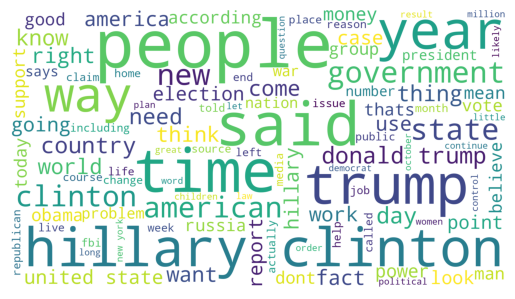

In [30]:
wc=WordCloud(background_color="white",max_words=100,max_font_size=256,random_state=42,width=1920,height=1080,stopwords=None)
wc.generate(' '.join(data3_c['text']))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [31]:
data4_c=optimized_cleaning_with_label_replace(data4,'REAL','FAKE')

Optimizing cleaning.
Cleaning CSV.
Cleaning completed.
Cleaning CSV.
Cleaning completed.


Before cleaning,

In [32]:
data4.tail(2)

,Unnamed: 0,title,text,label
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


After cleaning

In [33]:
data4_c.tail(2)

,Unnamed: 0,title,text,identity,length
5929,4021,"In Ethiopia, Obama seeks progress on peace, se...",addis ababa ethiopia president obama convened ...,1,6991
5930,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,jeb bush suddenly attacking trump heres matter...,1,4818


Visual representation

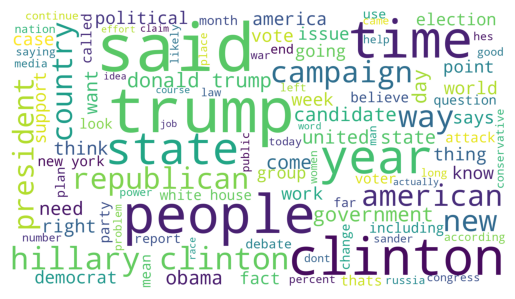

In [34]:
wc=WordCloud(background_color="white",max_words=100,max_font_size=256,random_state=42,width=1920,height=1080,stopwords=None)
wc.generate(' '.join(data4_c['text']))
plt.imshow(wc)
plt.axis('off')
plt.show()

Dropping all unnecessary columns

In [35]:
data1_fake_c=data1_fake_c[['text','identity']]
data1_real_c=data1_real_c[['text','identity']]
data2_c=data2_c[['text','identity']]
data3_c=data3_c[['text','identity']]
data4_c=data4_c[['text','identity']]

In [36]:
data1_c=pd.concat([data1_real_c,data1_fake_c],ignore_index=True)

In [37]:
data1_c.tail(2)

,text,identity
43050,21st century wire says al jazeera america hist...,0
43051,21st century wire says 21wire predicted new ye...,0


Finalizing dataset by combining all cleaned datasets

In [38]:
data_c=pd.concat([data1_c,data2_c,data3_c],ignore_index=True)

In [39]:
data_c=data_c[['text','identity']]
data_c.reset_index()
data_c.tail(4)

,text,identity
65300,posted october 31 2016 carol adl news 0 commen...,0
65301,posted november 1 2016 edmondo burr middle eas...,0
65302,sputnik reports australian prime minister malc...,0
65303,johnson johnson lose multimillion dollar case ...,0


Visual representation

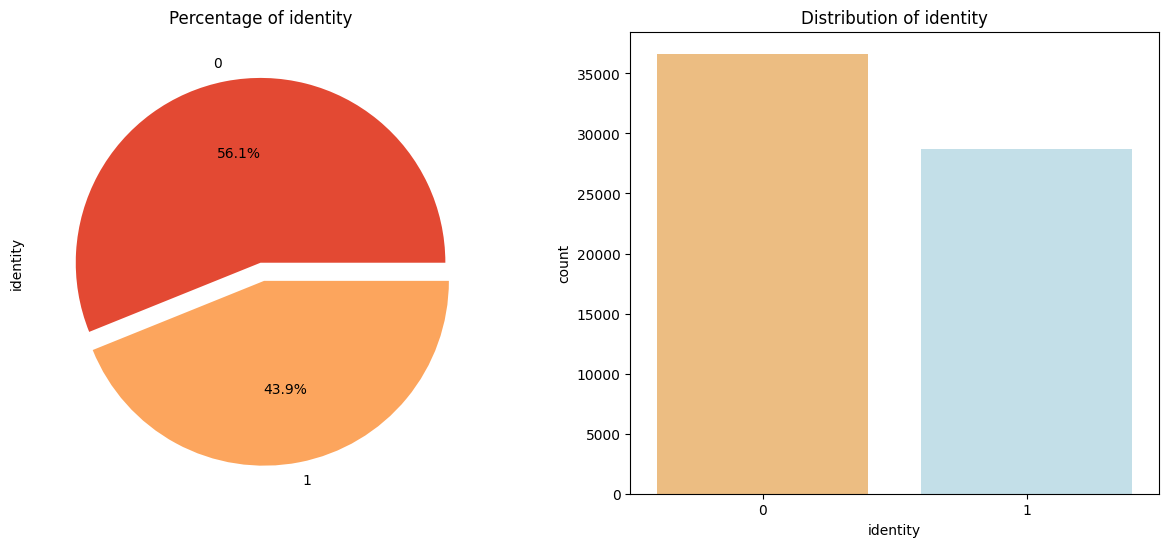

In [40]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
data_c['identity'].value_counts().plot.pie(explode=[0,0.1],colors=sns.color_palette("RdYlBu"),autopct='%1.1f%%',ax=ax1)
ax1.set_title('Percentage of identity')
sns.countplot(x='identity',data=data_c,ax=ax2,palette='RdYlBu')
ax2.set_title('Distribution of identity')
plt.show()

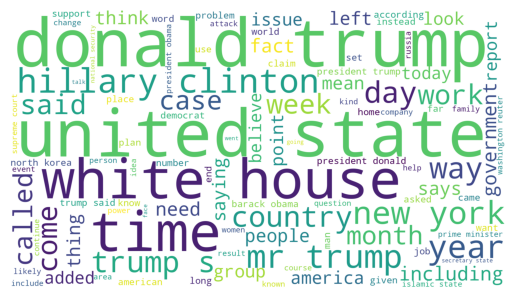

In [41]:
wc=WordCloud(background_color="white",max_words=100,max_font_size=256,random_state=42,width=1920,height=1080,stopwords=None)
wc.generate(' '.join(data_c['text']))
plt.imshow(wc)
plt.axis('off')
plt.show()

Importing dependencies for ANN and Representation

In [42]:
import tensorflow as tf
import itertools

from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Conv1D,MaxPool1D,Dropout,GRU
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

tf.keras.utils.set_random_seed(135656)

*Tokenizing* the dataset for use in the ANN (One_Hot Representation)

In [43]:
print('Tokenizing DF.')
tokenizer=Tokenizer(num_words=max_features,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',split =' ') #filters is redundant, but still keeping if I missed any symbols previously
tokenizer.fit_on_texts(texts=data_c['text']) #fit
X=tokenizer.texts_to_sequences(texts=data_c['text'])
X=pad_sequences(sequences=X,maxlen=max_len,padding='pre') #padding the set of words
Y=data_c['identity'].values #identities (0/1)
V=tokenizer.word_index #vocabulary
print('Tokenized DF.')

Tokenizing DF.
Tokenized DF.


Creating the model and compiling it

In [44]:
def create_lstm_model(max_features): #creating the internal structure of the simple LSTM model
        print('Creating LSTM model.')
        lstm_model=Sequential(name='Sierra')
        lstm_model.add(layer=Embedding(input_dim=max_features,output_dim=128,name='Echo'))
        lstm_model.add(layer=LSTM(units=128,name='Lima'))
        lstm_model.add(layer=Dense(1,activation='sigmoid',name ='Omega'))
        print('Model creation completed.')
        lstm_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
        print('Model compiled.')
        return lstm_model

In [45]:
lstm_model=create_lstm_model(max_features)

Creating LSTM model.
Model creation completed.
Model compiled.


Summary of the model

In [46]:
lstm_model.summary()

Model: "Sierra"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Echo (Embedding)            (None, None, 128)         1310720   
                                                                 
 Lima (LSTM)                 (None, 128)               131584    
                                                                 
 Omega (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,442,433
Trainable params: 1,442,433
Non-trainable params: 0
_________________________________________________________________


Splitting the tokenized DF based on *test_prop*

In [47]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=test_prop)

Training the LSTM model

In [48]:
history=lstm_model.fit(X_train,Y_train,batch_size=batch_size,epochs=epoch_count,verbose=1,validation_split=test_prop,shuffle=1,use_multiprocessing=True)

Epoch 1/100
63/63 [==============================] - 40s 542ms/step - loss: 0.4669 - accuracy: 0.7727 - val_loss: 0.3269 - val_accuracy: 0.8577
Epoch 2/100
63/63 [==============================] - 32s 502ms/step - loss: 0.2623 - accuracy: 0.8904 - val_loss: 0.2690 - val_accuracy: 0.8829
Epoch 3/100
63/63 [==============================] - 30s 473ms/step - loss: 0.2008 - accuracy: 0.9176 - val_loss: 0.2546 - val_accuracy: 0.8843
Epoch 4/100
63/63 [==============================] - 32s 504ms/step - loss: 0.1603 - accuracy: 0.9288 - val_loss: 0.2641 - val_accuracy: 0.8876
Epoch 5/100
63/63 [==============================] - 31s 487ms/step - loss: 0.1323 - accuracy: 0.9389 - val_loss: 0.2599 - val_accuracy: 0.8810
Epoch 6/100
63/63 [==============================] - 29s 459ms/step - loss: 0.1278 - accuracy: 0.9416 - val_loss: 0.2770 - val_accuracy: 0.8848
Epoch 7/100
63/63 [==============================] - 28s 441ms/step - loss: 0.1374 - accuracy: 0.9393 - val_loss: 0.2821 - val_accuracy:

Visualization of accuracy and loss using graph

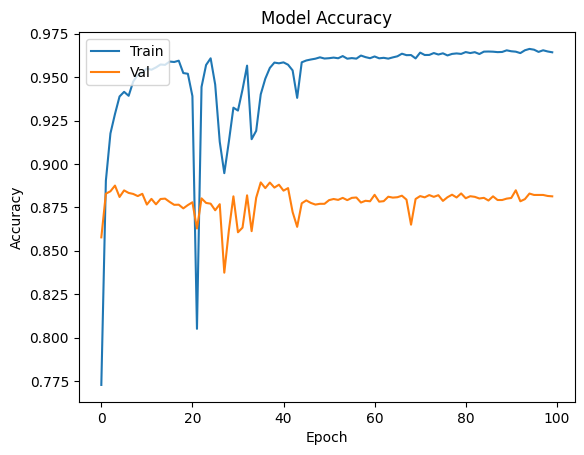

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

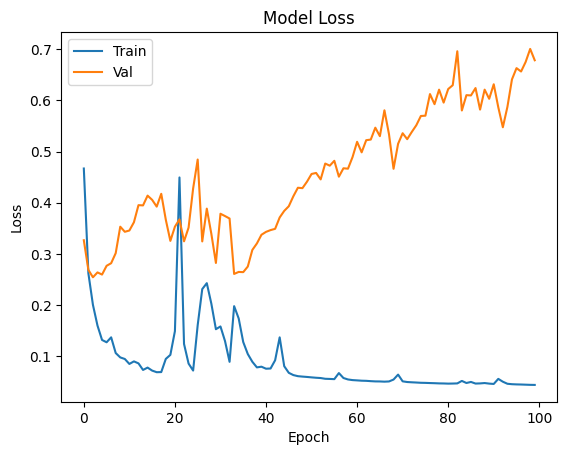

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Validation of the model

In [51]:
Y_pred=(lstm_model.predict(X_test,batch_size=batch_size,verbose=1,use_multiprocessing=True)>=0.5).astype(int)

39/39 [==============================] - 6s 133ms/step


In [52]:
accuracy_score(Y_test,Y_pred)

0.8816864026133115

In [53]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89     11054
           1       0.86      0.87      0.86      8538

    accuracy                           0.88     19592
   macro avg       0.88      0.88      0.88     19592
weighted avg       0.88      0.88      0.88     19592



In [54]:
lstm_model.save('models/ds1-2-3-4_combined_epoch-100_extensive_v2')

In [55]:
saved_lstm_model=tf.keras.saving.load_model('models/ds1-2-3-4_combined_epoch-100_extensive_v2')

In [56]:
y_pred=(saved_lstm_model.predict(X_test,batch_size=batch_size,verbose=1,use_multiprocessing=True)>=0.5).astype(int)

39/39 [==============================] - 6s 133ms/step


In [57]:
accuracy_score(Y_test,y_pred)

0.8816864026133115

Importing *ConfusionMatrixDisplay* function to visualize the confusion matrix

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay

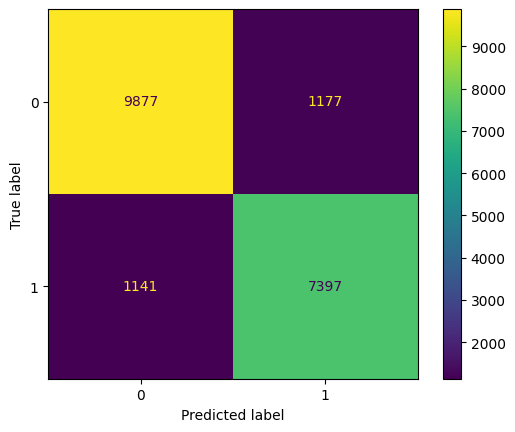

In [59]:
cm_y_pred=confusion_matrix(Y_test,y_pred)
disp=ConfusionMatrixDisplay(cm_y_pred)
disp.plot()

In [60]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89     11054
           1       0.86      0.87      0.86      8538

    accuracy                           0.88     19592
   macro avg       0.88      0.88      0.88     19592
weighted avg       0.88      0.88      0.88     19592



In [61]:
string_predict1=pd.DataFrame()
string_predict1=data_c.iloc[20000:24000]
string_predict1

,text,identity
20000,gandhinagar india reuters leaders india japan ...,1
20001,lisbon reuters number foreign tourists visitin...,1
20002,ankara reuters turkey said thursday expected h...,1
20003,ankara reuters turkey remains dependable membe...,1
20004,erbil iraq reuters iraq s parliament right rem...,1
...,...,...
23995,vice president mike pence chose appear abc nbc...,0
23996,following boston judge s refusal renew tempora...,0
23997,earlier week leaked draft executive orders cir...,0
23998,donald trump terrible reminded daily week disa...,0


In [62]:
X=tokenizer.texts_to_sequences(texts=string_predict1['text'])
X=pad_sequences(sequences=X,maxlen=max_len,padding='pre')
string_predict1_res=(saved_lstm_model.predict(X,batch_size=batch_size,verbose=1,use_multiprocessing=True)>=0.5).astype(int)

8/8 [==============================] - 1s 134ms/step


In [63]:
accuracy_score(string_predict1_res,string_predict1['identity'])

0.99775

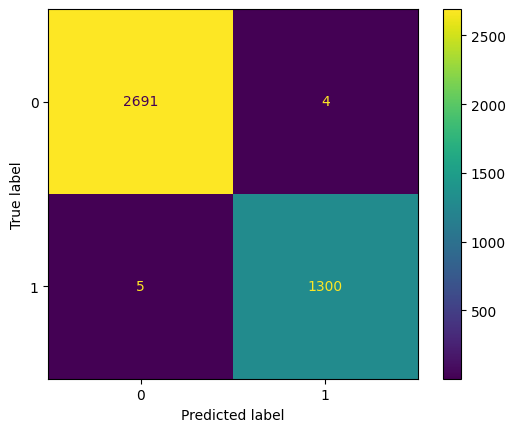

In [64]:
cm_string_predict1_res=confusion_matrix(string_predict1_res,string_predict1['identity'])
disp=ConfusionMatrixDisplay(cm_string_predict1_res)
disp.plot()

In [65]:
string_predict2=pd.DataFrame()
string_predict2=data_c.iloc[40000:48000]
string_predict2

,text,identity
40000,s pretty safe stand moving traffic intentional...,0
40001,facebook ceo founder mark zuckerberg clearly m...,0
40002,apparently black lives matter terror group has...,0
40003,black lives matter supporters use tactics isis...,0
40004,people petition started july 6th asking govern...,0
...,...,...
47995,roethle household leawood kan children woke we...,0
47996,paris casual remark frances wartime actions ma...,0
47997,home big brother science technology googleamaz...,1
47998,d buxman october 31 2016 speculator simply bes...,1


In [66]:
X=tokenizer.texts_to_sequences(texts=string_predict2['text'])
X=pad_sequences(sequences=X,maxlen=max_len,padding='pre')
string_predict2_res=(saved_lstm_model.predict(X,batch_size=batch_size,verbose=1,use_multiprocessing=True)>=0.5).astype(int)

16/16 [==============================] - 2s 136ms/step


In [67]:
accuracy_score(string_predict2_res,string_predict2['identity'])

0.899625

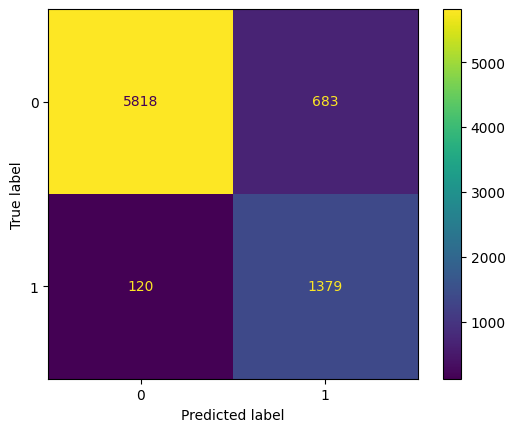

In [68]:
cm_string_predict2_res=confusion_matrix(string_predict2_res,string_predict2['identity'])
disp=ConfusionMatrixDisplay(cm_string_predict2_res)
disp.plot()

Work in Progress below this part

In [69]:
string_predict3=pd.DataFrame()
string_predict3['text']=''